In [1]:
# Imports

import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

import pickle

In [2]:
full_df = pd.read_csv("../../Data/creditcard.csv")
full_df.drop(columns='Time', inplace=True)

In [3]:
fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

In [4]:
not_fraud_df = full_df.loc[full_df['Class']==0]
not_fraud_df = not_fraud_df.sample(n=492, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [5]:
new_df = fraud_df.append(not_fraud_df, ignore_index=True)

In [6]:
new_df.shape

(984, 30)

In [7]:
target = new_df["Class"]
target_names = ["negative", "positive"]

In [8]:
data = new_df.drop("Class", axis=1)
feature_names = data.columns
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [9]:
target.shape

(984,)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [11]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [12]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [13]:
#save
#filename = 'fraud_model2scaled.sav'
#model = pickle.load(open(filename, 'rb'))

In [14]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.919


In [15]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.86      1.00      0.92       120
    positive       1.00      0.84      0.91       126

    accuracy                           0.92       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.92      0.92       246



In [16]:
#open saved file
#pickle.dump(model, open(filename, 'wb'))

In [17]:
# Save and load temporarily
np.save('datasv.npy', (X_train_scaled, X_test_scaled, y_train, y_test))
X_train_scaled, X_test_scaled, y_train, y_test = np.load('datasv.npy', allow_pickle=True)

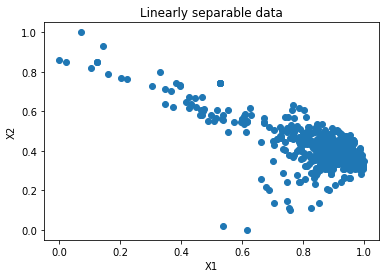

In [34]:
# Generate scatter plot for training data
fig, ax = plt.subplots( nrows=1, ncols=1 )
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
fig.savefig('ScaledData.png')

In [22]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

In [23]:
# Fit data
clf = clf.fit(X_train_scaled, y_train)

In [24]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[  7  34  52  53  63  75  84  85  87 104 116 117 127 132 147 148 154 178
 185 188 198 204 214 225 226 233 235 240 245 247 250 251 253 256 261 281
 331 352 362 371 379 385 392 393 395 418 427 432 435 438 453 462 467 482
 491 494 498 504 533 547 553 554 562 563 579 581 582 585 592 605 612 617
 629 630 638 645 647 675 679 688 696 711  10  25  33  38  40  44  65  81
  98 108 119 124 129 133 153 166 172 176 183 189 201 208 218 236 252 276
 280 282 317 325 336 337 349 350 367 384 396 404 413 414 421 431 433 487
 505 509 517 521 525 528 545 552 561 574 598 602 604 619 620 634 636 642
 643 648 654 659 664 683 703 707 713 722 723 726 727 734]


In [25]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[82 76]


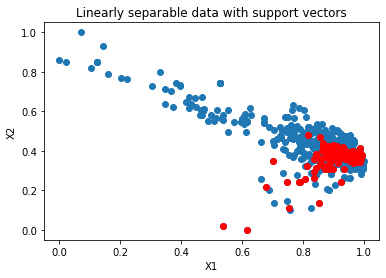

In [35]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
fig2, ax = plt.subplots( nrows=1, ncols=1 )
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
fig2.savefig('ScaledDataWithVectors.png')